# FCN

https://arxiv.org/pdf/1411.4038.pdf

### Segmentation   
   
   
Classification은 전체 input image에 대한 하나의 클래스를 결정하는거지만, Segmentation은 클래스를 input image의 픽셀 별로 prediction 하고 classification을 하는 것입니다. 즉, segmentation은 pixel의 위치 또한 중요합니다. 

### Introduction

FCN 이전의 방법들은 classification network를 사용해서 문제를 해결했었다고 합니다. 하지만 FCN은
기존의 classification network인 AlexNet, VGGNet, 등을 그대로 사용하는 대신, 마지막에 Fully Connected
network를 사용하는 대신 Fully Convolutional network를 사용한다고 합니다. 그 이유는 Fully Connected
network는 input이 어떤 class에 속하는지에 대한 정보는 나오지만, spatial한, 즉 공간 정보는 나오지
않아서 입니다. 반면에 Fully Convolutional network를 이용하면 2x2 matrix를 통해 중요 정보를 가지고
올 수 있어서 사용한다고 합니다. 또한 skip architecture를 이용해서 세부 정보와 얕은 정보를 합친다고
합니다.

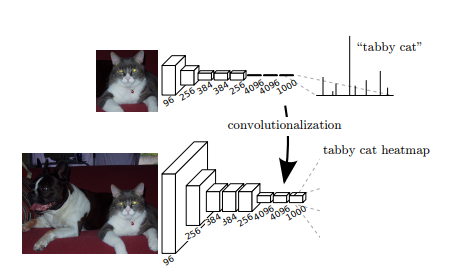

### FCN

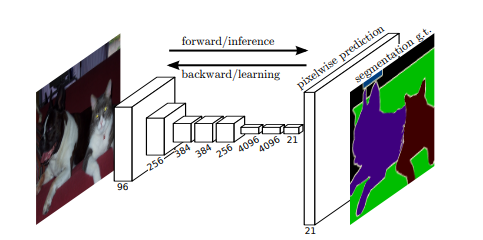

여기서 그림을 보시면 앞에 5개의 블록이 feature extraction, 뒤에 있는 3개의 블록이 Fully Convolutional
Network 입니다. Fully Convolutional Network에서는 1x1 convolution을 사용합니다. 후에 pixelwise prediction에서 아까 언급했던 skip architecture가 적용된다고 볼 수 있습니다.

여기서 이 1x1 convolution을 왜 쓸까에 대해 궁금해서 조금 알아보게 되었는데, 제가 잘 이해한 것인지는
모르겠지만 이게 unsupervised learning인 것으로 알고 있습니다. 그러니까 input data를 1대 1 로 가져
간다면 연산량이 정말 많아지고, 필요없는 정보 또한 많이 가져가게 됩니다. 이를 대비해 압축을 해나가는
것 같습니다. 즉, 압축을 하면서 중요한 정보만 압축해야 하는데, 그걸 이 모델이 학습해서 알아내는 것
같습니다.

#### Classification Nets

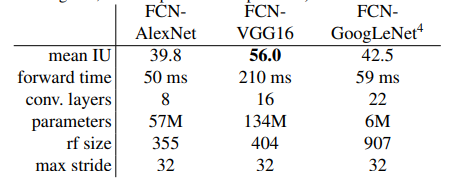

Classification network는 VGGNet이 성능이 가장 좋게 나와서 이걸 쓴다고 나와 있습니다.

#### Skip Architecture

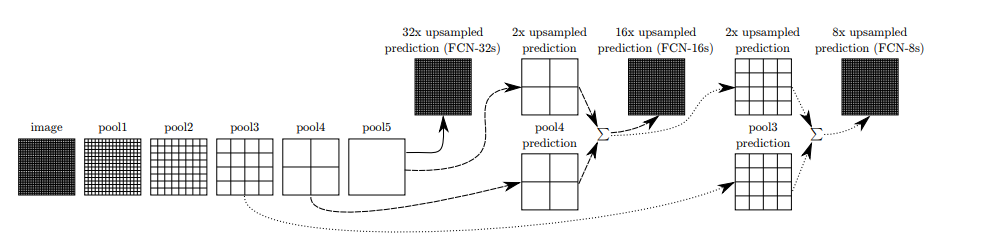

이제 Skip architecture에 대해 이야기를 해보겠습니다. 우선 pool1 부터 pool5까지가 위에서 봤던
5개의 블록으로 볼 수 있습니다. 만약 Convolution 연산만으로 쭉 수행한 후 deconvolution을 하여
upsampling을 한다면 세부적인 부분을 담지 못합니다. 그래서 segmentation을 하기에는 부족하다
할 수 있습니다. 그래서 이 세부적인 정보를 가져오기 위해서 이전 단계의 feature를 upsampling
해서 합쳐주는 것입니다. 우선 pool연산을 거치면서 만약 224x224x3 이미지가 들어온다면 순서대로
112x112x3, 56x56x3, 28x28x3, 14x14x3, 7x7x3 이 나오게 되고, 7x7x3을 2배로 upsampling한 
결과와 pool4를 더해서 새로운 feature를 만들고, 이 결과를 다시 2배로 upsampling한 후 pool3와
더해서 새로운 feature를 만들어내는 것입니다.
정리하자면 downsamplng한 feature와 upsampling한 feature를 연결하여 local information을 그대로
transform 하는 것입니다. 즉 여러 convolution layer에서의 feature들을 공간상에서의 정보와 합치는데
도움을 주는 것입니다.

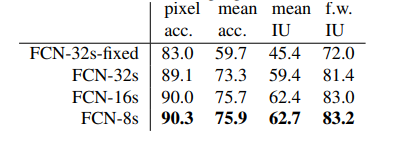

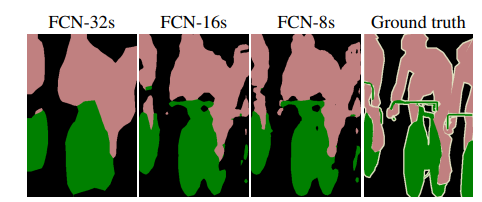

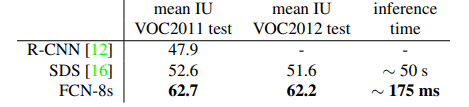

최종적으로 다른 기법들과 비교한 결과 우월한 성능을 보인 것을 확인할 수 있습니다.